In [6]:
# This filters any outputs from libraries that we don't want to see, and clear_output removes any outputs generated by a cell
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
clear_output()

In [7]:
import numpy as np
import pandas as pd

# Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno #For missing value visualization
#from wordcloud import WordCloud

# From here: https://www.tutorialspoint.com/plotly/plotly_plotting_inline_with_jupyter_notebook.htm
import plotly.offline as py
py.init_notebook_mode(connected=True)

# library for loading
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

import time
import datetime

In [8]:
# matching strings via regex expressions
import re

# string utility
import string

# main nlp library and modell
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
clear_output()

In [9]:
# Calculation of Performance of Models
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

In [10]:
# Regression model
from sklearn.linear_model import LogisticRegression

# Ensemble model
from sklearn.tree import DecisionTreeClassifier

# Essentially, Random Forest is a group of decision trees
from sklearn.ensemble import RandomForestClassifier

# Support Vector Classifier, based on SVMs (Support Vector Machines)
from sklearn.svm import SVC

# https://nlp.stanford.edu/IR-book/html/htmledition/naive-bayes-text-classification-1.html
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import ExtraTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

# Random classification, ignoring inputs
from sklearn.dummy import DummyClassifier

In [12]:
# loading excel table
data = pd.read_excel(r"C:\Users\Arne Jandt\anaconda3\envs\UebungenProjekt\bmw_cardata_all.xlsx")
data.head()

,Version,Price,car_kilometerstand,car_erstzulassung,car_leistung,car_gebraucht_oder_new,car_fahrzeughalter,car_getriebe,car_kraftstoff,car_verbrauch,car_co2_ausstoss
0,xDrive 30e Advantage Steptronic,"€ 43.490,-",42.092 km,09/2020,215 kW (292 PS),Gebraucht,1 Fahrzeughalter,Automatik,Elektro/Benzin,- (l/100 km),49 g/km (komb.)
1,xDrive30i Leder Pano Totwinkel HiFi Kamera Navi,"€ 59.510,-",0 km,- (Erstzulassung),180 kW (245 PS),Neu,- (Fahrzeughalter),Automatik,Benzin,"7,7 l/100 km (komb.)",175 g/km (komb.)
2,xDrive20d HUD DA+ Pano PA+ Sportsitze AHK,"€ 46.490,-",16.100 km,11/2020,140 kW (190 PS),Gebraucht,1 Fahrzeughalter,Automatik,Diesel,"4,8 l/100 km (komb.)",126 g/km (komb.)
3,xDrive20i Advatage Aut. Navi PDC RFK AHK LED,"€ 34.630,-",56.100 km,11/2019,135 kW (184 PS),Gebraucht,1 Fahrzeughalter,Automatik,Benzin,"6,6 l/100 km (komb.)",151 g/km (komb.)
4,xDrive30d M Sport (Gestiksteuerung Head-Up),"€ 44.290,-",58.417 km,07/2019,195 kW (265 PS),Gebraucht,2 Fahrzeughalter,Automatik,Diesel,6 l/100 km (komb.),157 g/km (komb.)


In [13]:
# inspecting data
data.isnull().sum()

Version                   20
Price                      0
car_kilometerstand         0
car_erstzulassung          0
car_leistung               0
car_gebraucht_oder_new     0
car_fahrzeughalter         0
car_getriebe               0
car_kraftstoff             0
car_verbrauch             13
car_co2_ausstoss           0
dtype: int64

In [14]:

cleaned_data = data.dropna()


In [15]:
# inspecting data shape
cleaned_data.shape

(8946, 11)

In [16]:
# inspecting data
data.nunique()

Version                   1741
Price                     1106
car_kilometerstand        1348
car_erstzulassung          310
car_leistung                79
car_gebraucht_oder_new       6
car_fahrzeughalter           9
car_getriebe                 5
car_kraftstoff               7
car_verbrauch              139
car_co2_ausstoss           184
dtype: int64

<AxesSubplot:>

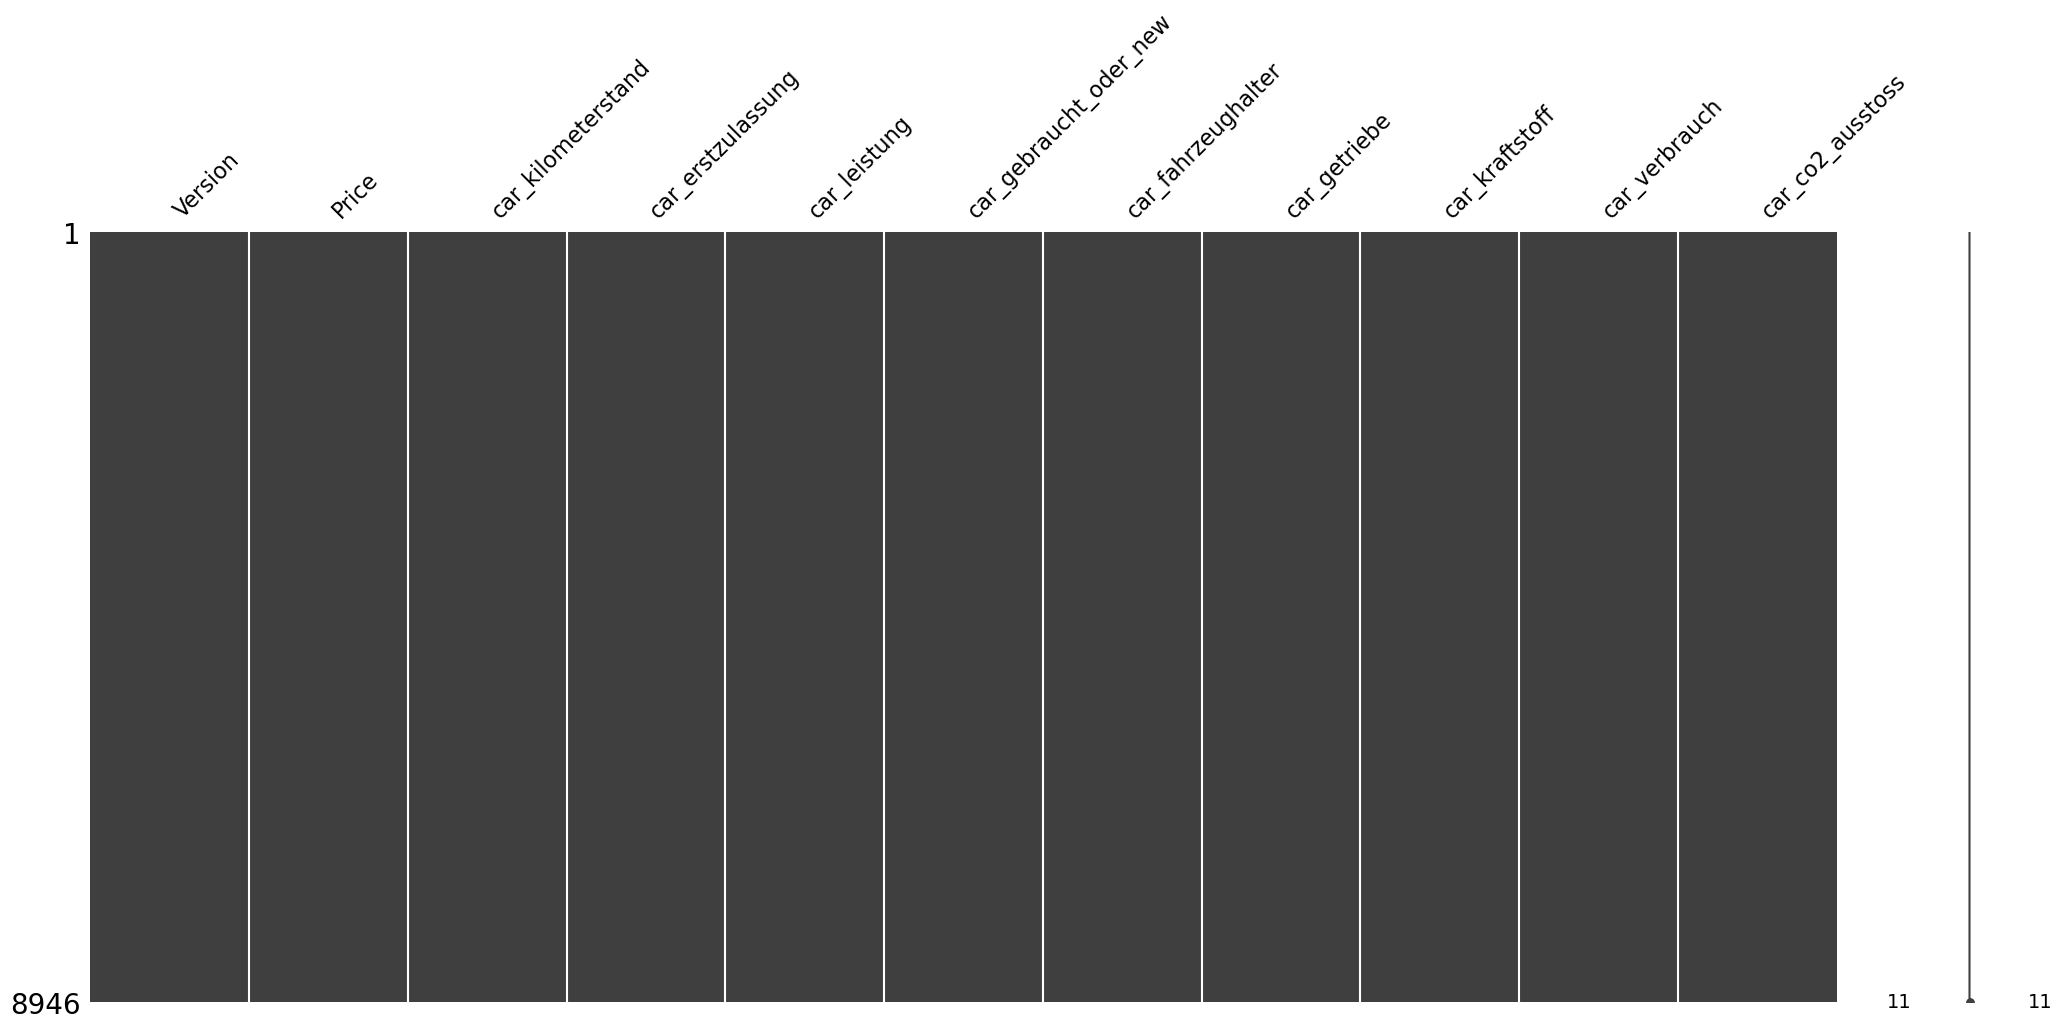

In [17]:
# searching for missing data
msno.matrix(cleaned_data)

In [18]:
# inspecting column values
#cleaned_data['car_gebraucht_oder_new'].unique()
#cleaned_data['car_getriebe'].unique()
cleaned_data['car_kraftstoff'].unique()

array(['Elektro/Benzin', 'Benzin', 'Diesel', 'Elektro/Diesel', 'Sonstige',
       '- (Kraftstoff)', 'Automatik'], dtype=object)

In [19]:
# drop column car_fahrzeughalter and car_verbrauch
cleaned_data = data.drop(['car_fahrzeughalter','car_verbrauch'],axis=1)


# cleaning column car_kilometerstand
# initializing unit 
unit = "km"
  
# Remove Units from Value List
# Using replace() + strip() + list comprehension
cleaned_data["car_kilometerstand"] = [sub.replace(unit, "").strip() for sub in cleaned_data["car_kilometerstand"]]
cleaned_data['car_kilometerstand'] = [sub.replace('.', "").strip() for sub in cleaned_data["car_kilometerstand"]]
cleaned_data['car_kilometerstand'] = pd.to_numeric(cleaned_data['car_kilometerstand'])

# clean column car_co2_ausstross
# initializing unit 
unit = "g/km (komb.)"
  
# Remove Units from Value List
# Using replace() + strip() + list comprehension
cleaned_data["car_co2_ausstoss"] = [sub.replace(unit, "").strip() for sub in cleaned_data["car_co2_ausstoss"]]
cleaned_data["car_co2_ausstoss"] = [sub.replace("- (g/km)", "0").strip() for sub in cleaned_data["car_co2_ausstoss"]]
cleaned_data['car_co2_ausstoss'] = pd.to_numeric(cleaned_data['car_co2_ausstoss'])


#cleaning column erstzulassung
cleaned_data['car_erstzulassung'] = cleaned_data['car_erstzulassung'].replace('- (Erstzulassung)', np.nan)
cleaned_data['car_erstzulassung'] = cleaned_data['car_erstzulassung'].fillna(0)
cleaned_data['car_erstzulassung'] = pd.to_datetime(cleaned_data['car_erstzulassung'])
cleaned_data['car_erstzulassung'] = cleaned_data['car_erstzulassung'].dt.strftime('%Y%m%d').astype(int)

# cleaning column car_leistung
for i in range(len(cleaned_data)):
    strt_pos = cleaned_data['car_leistung'].values[i].find('(')
    stop_pos = cleaned_data['car_leistung'].values[i].find(')')
    cleaned_data['car_leistung'].values[i] = f"{cleaned_data['car_leistung'].values[i][:strt_pos:].strip()} {cleaned_data['car_leistung'].values[i][stop_pos+1:].strip()}"
cleaned_data['car_leistung'] = cleaned_data['car_leistung'].str.replace(r'\D', '')
cleaned_data['car_leistung'] = pd.to_numeric(cleaned_data['car_leistung'])


# cleaning column 'car_kraftstoff'
cleaned_data['car_kraftstoff'] = cleaned_data['car_kraftstoff'].replace({'Benzin': 1,'Diesel':2,'Elektro/Benzin': 3,'Elektro/Diesel':4,'Sonstige': 5,
                                                                      '- (Kraftstoff)': 0, 'Automatik': 0})
# cleaning column 'car_getriebe'
cleaned_data['car_getriebe'] = cleaned_data['car_getriebe'].replace({'Automatik': 1, 'Schaltgetriebe': 2,'Halbautomatik': 3,  '- (Getriebe)': 0, '1 Fahrzeughalter': 0,})

# cleaning column 'car_gebraucht_oder_new'
cleaned_data['car_gebraucht_oder_new'] = cleaned_data['car_gebraucht_oder_new'].replace({'Gebraucht': 1, 'Neu': 2, 'Vorführfahrzeug': 3, 'Jahreswagen':4, 'Oldtimer': 5,'195 kW (265 PS)':0, '290 kW (394 PS)':0})


# cleaning column 'Price'
cleaned_data['Price'] = [sub.replace('€', "").strip() for sub in cleaned_data['Price']]
cleaned_data['Price'] = [sub.replace(',-', "").strip() for sub in cleaned_data['Price']]
cleaned_data['Price'] = [sub.replace('.', "").strip() for sub in cleaned_data['Price']]
cleaned_data['Price'] = pd.to_numeric(cleaned_data['Price'])



cleaned_data.head()

,Version,Price,car_kilometerstand,car_erstzulassung,car_leistung,car_gebraucht_oder_new,car_getriebe,car_kraftstoff,car_co2_ausstoss
0,xDrive 30e Advantage Steptronic,43490,42092,20200901,215,1,1,3,49
1,xDrive30i Leder Pano Totwinkel HiFi Kamera Navi,59510,0,19700101,180,2,1,1,175
2,xDrive20d HUD DA+ Pano PA+ Sportsitze AHK,46490,16100,20201101,140,1,1,2,126
3,xDrive20i Advatage Aut. Navi PDC RFK AHK LED,34630,56100,20191101,135,1,1,1,151
4,xDrive30d M Sport (Gestiksteuerung Head-Up),44290,58417,20190701,195,1,1,2,157


In [20]:
# importing libaries for stemming
import nltk
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\Arne
[nltk_data]     Jandt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Arne
[nltk_data]     Jandt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """

    tokens = nltk.wordpunct_tokenize(column)
    return [w for w in tokens]    

In [22]:
# tokenize the Version column
cleaned_data['tokenized'] = cleaned_data.apply(lambda x: tokenize(str(x['Version'])), axis=1)
cleaned_data.head()

,Version,Price,car_kilometerstand,car_erstzulassung,car_leistung,car_gebraucht_oder_new,car_getriebe,car_kraftstoff,car_co2_ausstoss,tokenized
0,xDrive 30e Advantage Steptronic,43490,42092,20200901,215,1,1,3,49,"[xDrive, 30e, Advantage, Steptronic]"
1,xDrive30i Leder Pano Totwinkel HiFi Kamera Navi,59510,0,19700101,180,2,1,1,175,"[xDrive30i, Leder, Pano, Totwinkel, HiFi, Kame..."
2,xDrive20d HUD DA+ Pano PA+ Sportsitze AHK,46490,16100,20201101,140,1,1,2,126,"[xDrive20d, HUD, DA, +, Pano, PA, +, Sportsitz..."
3,xDrive20i Advatage Aut. Navi PDC RFK AHK LED,34630,56100,20191101,135,1,1,1,151,"[xDrive20i, Advatage, Aut, ., Navi, PDC, RFK, ..."
4,xDrive30d M Sport (Gestiksteuerung Head-Up),44290,58417,20190701,195,1,1,2,157,"[xDrive30d, M, Sport, (, Gestiksteuerung, Head..."


In [23]:
# searching for feature M, xDrive, Sport, d, Navi and Sport (optimized engine for sport purpose)
#https://stackoverflow.com/questions/45750493/see-if-item-in-each-row-of-pandas-series
cleaned_data = cleaned_data.assign(feature_M = cleaned_data['tokenized'].apply(set) & set(['M']),
                   feature_xDrive = cleaned_data['tokenized'].apply(set) & set(['xDrive']),
                    feature_Sport = cleaned_data['tokenized'].apply(set) & set(['Sport']),
                    feature_d = cleaned_data['tokenized'].apply(set) & set(['d']),
                    feature_Navi = cleaned_data['tokenized'].apply(set) & set(['Navi']))

In [25]:
# replace True or False with 0 and 1
cleaned_data['feature_M'] = cleaned_data['feature_M'].replace({False:0,True:1})
cleaned_data['feature_xDrive'] = cleaned_data['feature_xDrive'].replace({False:0,True:1})
cleaned_data['feature_Sport'] = cleaned_data['feature_Sport'].replace({False:0,True:1})
cleaned_data['feature_d'] = cleaned_data['feature_d'].replace({False:0,True:1})
cleaned_data['feature_Navi'] = cleaned_data['feature_Navi'].replace({False:0,True:1})

# write data in excel table
cleaned_data.to_excel("output_data_10.xlsx",index=False)

In [26]:
cleaned_data.head()

,Version,Price,car_kilometerstand,car_erstzulassung,car_leistung,car_gebraucht_oder_new,car_getriebe,car_kraftstoff,car_co2_ausstoss,tokenized,feature_M,feature_xDrive,feature_Sport,feature_d,feature_Navi
0,xDrive 30e Advantage Steptronic,43490,42092,20200901,215,1,1,3,49,"[xDrive, 30e, Advantage, Steptronic]",0,1,0,0,0
1,xDrive30i Leder Pano Totwinkel HiFi Kamera Navi,59510,0,19700101,180,2,1,1,175,"[xDrive30i, Leder, Pano, Totwinkel, HiFi, Kame...",0,0,0,0,1
2,xDrive20d HUD DA+ Pano PA+ Sportsitze AHK,46490,16100,20201101,140,1,1,2,126,"[xDrive20d, HUD, DA, +, Pano, PA, +, Sportsitz...",0,0,0,0,0
3,xDrive20i Advatage Aut. Navi PDC RFK AHK LED,34630,56100,20191101,135,1,1,1,151,"[xDrive20i, Advatage, Aut, ., Navi, PDC, RFK, ...",0,0,0,0,1
4,xDrive30d M Sport (Gestiksteuerung Head-Up),44290,58417,20190701,195,1,1,2,157,"[xDrive30d, M, Sport, (, Gestiksteuerung, Head...",1,0,1,0,0
